In [3]:
import matplotlib.pyplot as plt
import numpy as np
from cellpose import io, models, plot, train

io.logger_setup()

train_dir = '/Users/noah/Downloads/Finetune/Training'
test_dir = '/Users/noah/Downloads/Finetune/Validation'

2025-05-21 23:15:53,340 [INFO] WRITING LOG OUTPUT TO /Users/noah/.cellpose/run.log
2025-05-21 23:15:53,341 [INFO] 
cellpose version: 	4.0.2 
platform:       	darwin 
python version: 	3.12.9 
torch version:  	2.7.0


In [4]:
output = io.load_train_test_data(train_dir, test_dir, image_filter="_img",
                                mask_filter="_seg.npy", look_one_level_down=False)
images, labels, image_names, test_images, test_labels, image_names_test = output

model = models.CellposeModel(gpu=True, diam_mean=100)

model_path, train_losses, test_losses = train.train_seg(model.net,
                            train_data=images, train_labels=labels,
                            test_data=test_images, test_labels=test_labels,
                            weight_decay=0.1, learning_rate=1e-5,
                            n_epochs=100, model_name="finetune 100 epochs, dia 100")

2025-05-21 23:15:53,349 [INFO] not all flows are present, running flow generation for all images
2025-05-21 23:15:53,446 [INFO] 21 / 21 images in /Users/noah/Downloads/Finetune/Training folder have labels
2025-05-21 23:15:53,448 [INFO] not all flows are present, running flow generation for all images
2025-05-21 23:15:53,464 [INFO] 4 / 4 images in /Users/noah/Downloads/Finetune/Validation folder have labels
2025-05-21 23:15:53,465 [WARNING] diam_mean argument are not used in v4.0.1+. Ignoring this argument...
2025-05-21 23:15:53,515 [INFO] ** TORCH MPS version installed and working. **
2025-05-21 23:15:53,516 [INFO] >>>> using GPU (MPS)
2025-05-21 23:15:54,556 [INFO] >>>> loading model /Users/noah/.cellpose/models/cpsam
2025-05-21 23:15:55,035 [INFO] computing flows for labels


100%|██████████| 21/21 [00:23<00:00,  1.13s/it]

2025-05-21 23:16:18,731 [INFO] computing flows for labels



100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

2025-05-21 23:16:22,693 [INFO] >>> computing diameters



100%|██████████| 4/4 [00:00<00:00, 285.00it/s]

2025-05-21 23:16:22,790 [INFO] >>> normalizing {'lowhigh': None, 'percentile': None, 'normalize': True, 'norm3D': True, 'sharpen_radius': 0, 'smooth_radius': 0, 'tile_norm_blocksize': 0, 'tile_norm_smooth3D': 1, 'invert': False}


2025-05-21 23:16:23,687 [INFO] >>> n_epochs=100, n_train=21, n_test=4
2025-05-21 23:16:23,688 [INFO] >>> AdamW, learning_rate=0.00001, weight_decay=0.10000
2025-05-21 23:16:23,689 [INFO] >>> saving model to /Users/noah/Library/Mobile Documents/com~apple~CloudDocs/HvA/Master AAI/Afstuderen/Afstudeer Opdracht/finetune/models/finetune 100 epochs, dia 100
2025-05-21 23:16:39,389 [INFO] 0, train_loss=2.3476, test_loss=1.1462, LR=0.000000, time 15.70s
2025-05-21 23:17:17,844 [INFO] 5, train_loss=1.7272, test_loss=0.9213, LR=0.000006, time 54.15s
2025-05-21 23:17:56,272 [INFO] 10, train_loss=1.6134, test_loss=0.9128, LR=0.000010, time 92.58s
2025-05-21 23:19:12,950 [INFO] 20, train_loss=1.3371, test_loss=0.8291, LR=0.000010, time 169.26s
2025-05-21 23:20:32,169 [INFO] 30, train_loss=1.3257, test_loss=1.0027, LR=0.000010, time 248.48s
2025-05-21 23:21:50,557 [INFO] 40, train_loss=1.3780, test_loss=0.8219, LR=0.000010, time 326.87s
2025-05-21 23:23:08,506 [INFO] 50, train_loss=1.2769, test_loss

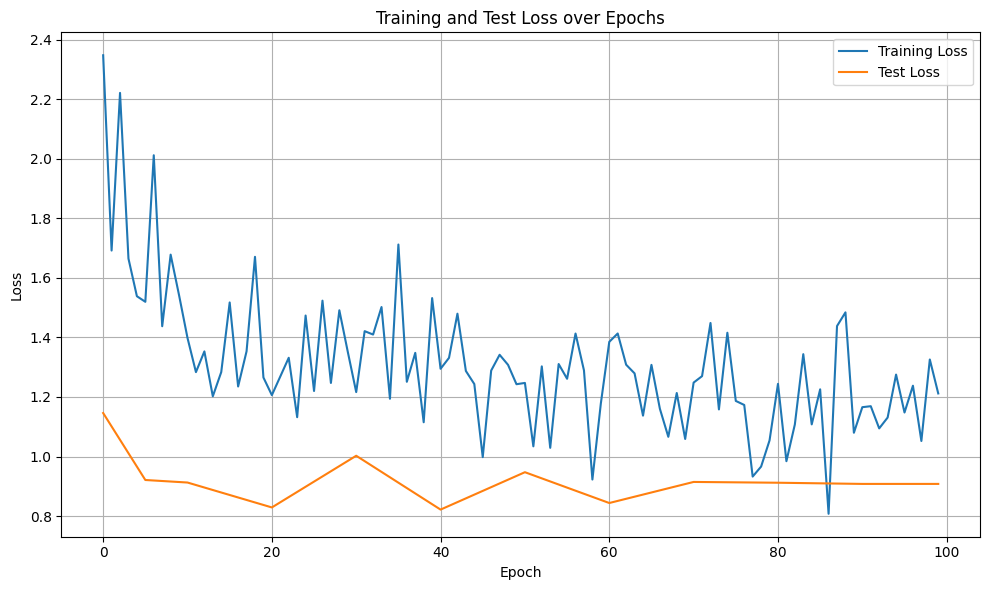

In [5]:
x = np.arange(len(test_losses))
mask = test_losses != 0
test_losses_interp = np.interp(x, x[mask], test_losses[mask])
test_losses_interp

plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses_interp, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2025-05-22 01:09:20,869 [INFO] ** TORCH MPS version installed and working. **
2025-05-22 01:09:20,870 [INFO] >>>> using GPU (MPS)
2025-05-22 01:09:23,331 [INFO] >>>> loading model models/finetune 100 epochs, dia 100


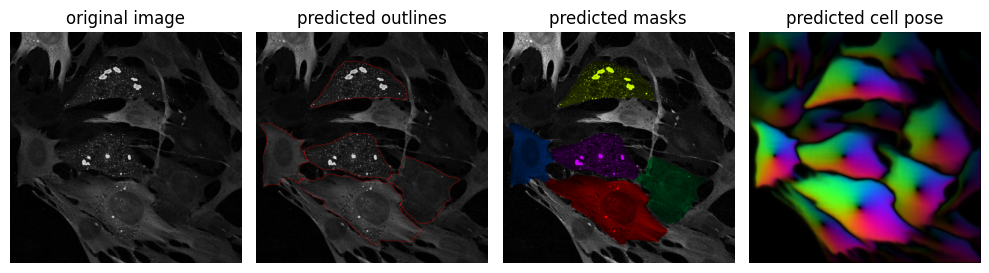

In [ ]:
model = models.CellposeModel(pretrained_model="models/finetune 100 epochs, dia 100",gpu=True)
img = io.imread('/Users/noah/Downloads/Finetune/Testing/15_img.tif')

masks, flows, styles = model.eval(img)

fig = plt.figure(figsize=(10, 10))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()